In [11]:
from skrub.datasets import fetch_road_safety

In [ ]:
road_safety_dataset = fetch_road_safety()

In [34]:
import pandas as pd

In [35]:
road_safety_dataset.X.Vehicle_Type.value_counts()

Vehicle_Type
9.0     271120
1.0      20281
19.0     19612
3.0       9966
5.0       8268
11.0      7758
8.0       7474
21.0      6785
4.0       2446
2.0       2392
20.0      2318
90.0      1740
10.0       906
98.0       790
17.0       650
97.0       301
22.0       226
16.0       119
18.0        20
23.0         9
Name: count, dtype: int64

<Axes: xlabel='Vehicle_Type'>

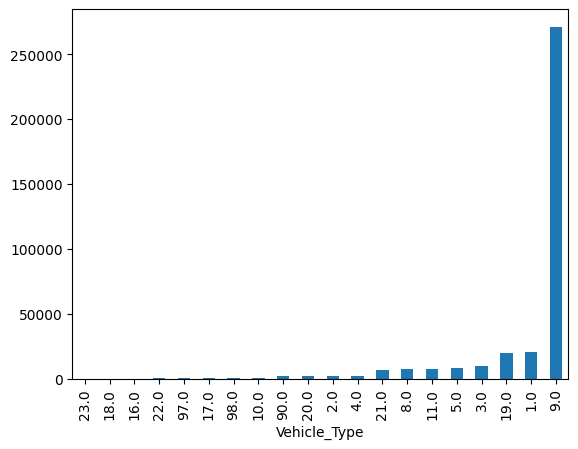

In [15]:
employee_salaries.X.Vehicle_Type.value_counts().sort_values().plot(kind="bar")


Let's say we want to group together the values basing on their frequencies so in the end we will end with 6 values instead of 20. That will reduce the number of features when we want to perform other operations - like one-hot encoding and clustering. 

In [36]:
road_safety_dataset.X.Vehicle_Type.value_counts().sort_values()

Vehicle_Type
23.0         9
18.0        20
16.0       119
22.0       226
97.0       301
17.0       650
98.0       790
10.0       906
90.0      1740
20.0      2318
2.0       2392
4.0       2446
21.0      6785
8.0       7474
11.0      7758
5.0       8268
3.0       9966
19.0     19612
1.0      20281
9.0     271120
Name: count, dtype: int64

Let's say we want to prepare ranges for the bins basing on their counts. We see that there are vehicle types that could be grouped into similiar categories based on the frequencies. Our bins would look like this:
[9, 650, 1740, 6785, 19612, 271120]
<!-- [9,
 20,
 119,
 226,
 301,

 650,
 790,
 906,

 1740,
 2318,
 2392,
 2446,

 6785,
 7474,
 7758,
 8268,
 9966,

 19612,
 20281,

 271120] -->


In [37]:
from _frequency_encoder import FrequencyEncoder

In [38]:
import numpy as np

In [29]:
# you need to put np.inf at the end of the list. 

In [39]:
fe = FrequencyEncoder(column = "Vehicle_Type", bins = [9, 650, 1740, 6785, 19612, 271120, np.inf])

In [40]:
fe.fit(X=road_safety_dataset.X)

FrequencyEncoder(bins=[9, 650, 1740, 6785, 19612, 271120, inf],
                 column='Vehicle_Type')

In [41]:
fe.transform(road_safety_dataset.X)

0         [19612.0, 271120.0)
1             [271120.0, inf)
2             [271120.0, inf)
3             [271120.0, inf)
4         [19612.0, 271120.0)
                 ...         
363238        [271120.0, inf)
363239        [271120.0, inf)
363240        [271120.0, inf)
363241        [271120.0, inf)
363242        [271120.0, inf)
Name: Vehicle_Type, Length: 363243, dtype: category
Categories (6, interval[float64, left]): [[9.0, 650.0) < [650.0, 1740.0) < [1740.0, 6785.0) < [6785.0, 19612.0) < [19612.0, 271120.0) < [271120.0, inf)]

In [31]:
fe.transform(employee_salaries.X)

0         [19612.0, 271120.0)
1             [271120.0, inf)
2             [271120.0, inf)
3             [271120.0, inf)
4         [19612.0, 271120.0)
                 ...         
363238        [271120.0, inf)
363239        [271120.0, inf)
363240        [271120.0, inf)
363241        [271120.0, inf)
363242        [271120.0, inf)
Name: Vehicle_Type, Length: 363243, dtype: category
Categories (6, interval[float64, left]): [[9.0, 650.0) < [650.0, 1740.0) < [1740.0, 6785.0) < [6785.0, 19612.0) < [19612.0, 271120.0) < [271120.0, inf)]

In [42]:
fe.transform(road_safety_dataset.X).value_counts()

Vehicle_Type
[271120.0, inf)        271120
[6785.0, 19612.0)       40251
[19612.0, 271120.0)     39893
[1740.0, 6785.0)         8896
[650.0, 1740.0)          2346
[9.0, 650.0)              675
Name: count, dtype: int64

Voila, now you have values encoded according to chosen ranges basing on frequencies.
Soon we will have automatic way to compute this basing on the quantiles. 

<Axes: xlabel='Vehicle_Type'>

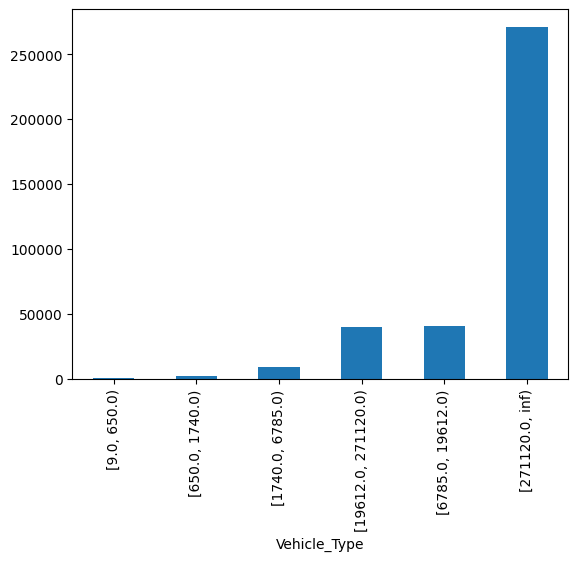

In [43]:
fe.transform(road_safety_dataset.X).value_counts().sort_values().plot(kind="bar")

next: one-hot encoding and clustering